<h1>Ödevinizi gönderirken numara_ad_soyad.ipynb uzantılı gönderin. Veri seti ve gönderilen ipynb uzantılı dosyayı aybu dosyada zipleyip birlikte gönderin<h1>
<h3>
    Ekte yer alan ThroraicSurgery.csv uzantılı dosya üzerinde işlemler yapılacaktır.
    Veri setine hem makine öğrenmesi hem de derin öğrenme yöntemleri uygulanacaktır.Her iki yöntem 40 puandır.
    
    Makine öğrenmesi yönteminde yapılacaklar:
    1. Makine öğrenmesi yöntemi için 5 tane algoritma seçmeniz gerekmektedir. (10 puan)
    2. Seçmiş olduğunuz yöntemlerin başarı sonuçlarını grafikte gösterin. (10 puan)
    3. En başarılı 3 algoritmaya parametre araması yapın. (10 puan)
    4. Parametre araması işlemlerinden sonra kullanılan algoritmaların başarı oranını gösterin. (10 puan)
    
    Derin öğrenme yönteminde yapılacaklar.
    1. Boyutları birbirinden farklı 3 tane model kullanın. Modelin hem uzunlukları hem de parametreler birbirinden farklı olsun. Epoch miktarları en az 300 olsun. Modelde Dense katmanını kullanının. (10 puan)
    2. Modellerin loss grafiklerini gösterin. (10 puan)
    3. En başarılı bulduğunuz modele Dropout katmanı ekleyin. (10 puan)
    4. Modele earlyStopping ekleyip çalıştırın. (10 puan)
    Verilerin işlenmesi 80 puan ve aşağıdaki sorular 20 puandır.
    <h3>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.neighbors import KNeighborsClassifier


data = pd.read_csv('indian_liver_patient.csv')

# Veri setini inceleyelim
print(data.head())

# Eksik verileri kontrol edelim
print(data.isnull().sum())

# Eksik verileri dolduralım
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

# Kategorik değişkenleri dönüştürelim
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Bağımsız değişkenleri ve hedef değişkeni ayıralım
X = data.drop('Target', axis=1)
y = data['Target']

# Verileri standartlaştıralım
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Eğitim ve test veri setlerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Target  
0      3.3                        0.90       1  


Logistic Regression Accuracy: 0.7606837606837606
Decision Tree Accuracy: 0.7094017094017094
Random Forest Accuracy: 0.7264957264957265
Support Vector Machine Accuracy: 0.7435897435897436
K-Nearest Neighbors Accuracy: 0.6666666666666666


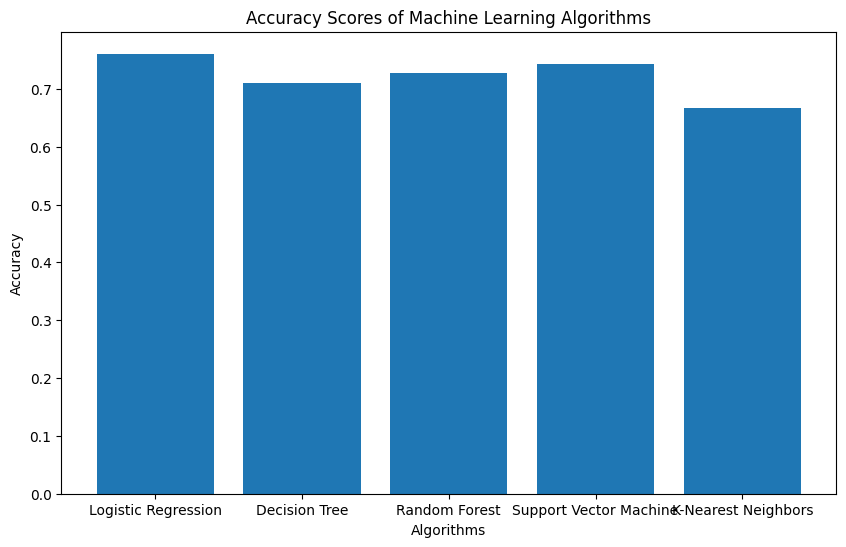

In [57]:
# Algoritmaları seçelim
from sklearn.neighbors import KNeighborsClassifier


algorithms = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Algoritmaların başarı sonuçlarını saklamak için bir liste oluşturalım
accuracy_scores = []

# Algoritmaları değerlendirelim ve başarı sonuçlarını kaydedelim
for name, algorithm in algorithms.items():
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'{name} Accuracy: {accuracy}')

# Algoritmaların başarı sonuçlarını gösteren bir grafik çizelim
plt.figure(figsize=(10, 6))
plt.bar(algorithms.keys(), accuracy_scores)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Machine Learning Algorithms')
plt.show()


In [58]:
# En başarılı 3 algoritmayı belirleyelim
top_3_algorithms = sorted(zip(algorithms.keys(), accuracy_scores), key=lambda x: x[1], reverse=True)[:3]
top_3_algorithms = [algorithm[0] for algorithm in top_3_algorithms]

# Parametre araması yapalım
params = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 5, 10, 20]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 20]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale']},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]}
}

best_params = {}

# Parametre araması işlemlerini gerçekleştirelim
for algorithm in top_3_algorithms:
    grid_search = GridSearchCV(algorithms[algorithm], params[algorithm], cv=5)
    grid_search.fit(X_train, y_train)
    best_params[algorithm] = grid_search.best_params_

# Parametre araması sonucunda elde edilen en iyi parametreleri gösterelim
for algorithm, params in best_params.items():
    print(f'Best parameters for {algorithm}: {params}')

# Parametre araması sonrası algoritmaları tekrar değerlendirelim
updated_accuracy_scores = []

for algorithm in top_3_algorithms:
    updated_algorithm = algorithms[algorithm]
    updated_algorithm.set_params(**best_params[algorithm])
    updated_algorithm.fit(X_train, y_train)
    y_pred = updated_algorithm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    updated_accuracy_scores.append(accuracy)
    print(f'Updated {algorithm} Accuracy: {accuracy}')


Best parameters for Logistic Regression: {'C': 1}
Best parameters for Support Vector Machine: {'C': 0.1, 'gamma': 0.1}
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}
Updated Logistic Regression Accuracy: 0.7606837606837606
Updated Support Vector Machine Accuracy: 0.7435897435897436
Updated Random Forest Accuracy: 0.7606837606837606


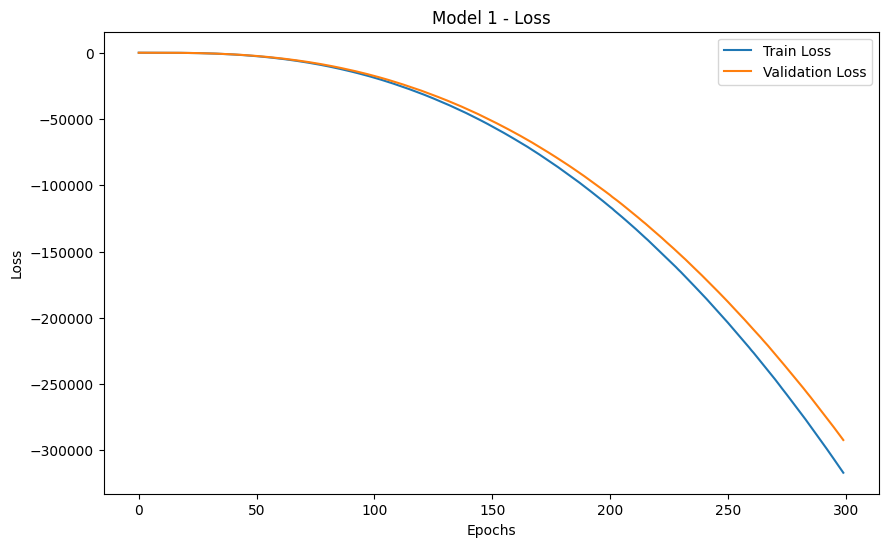

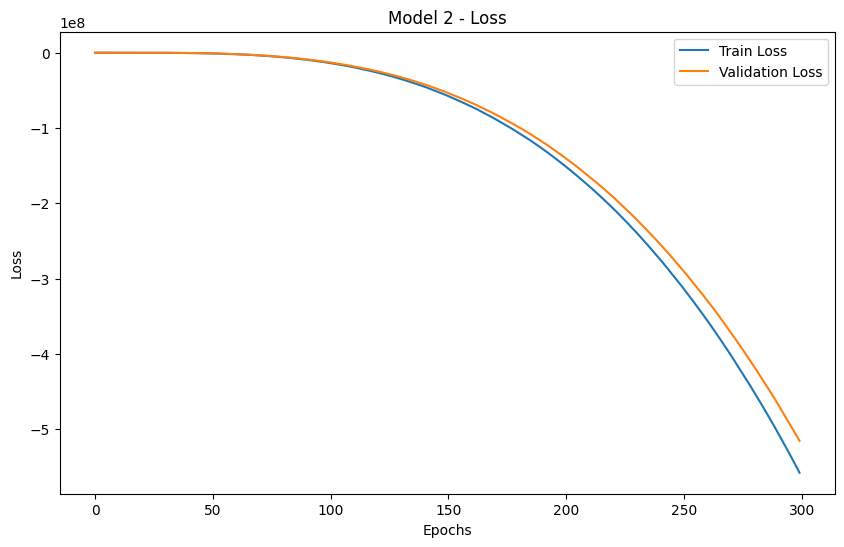

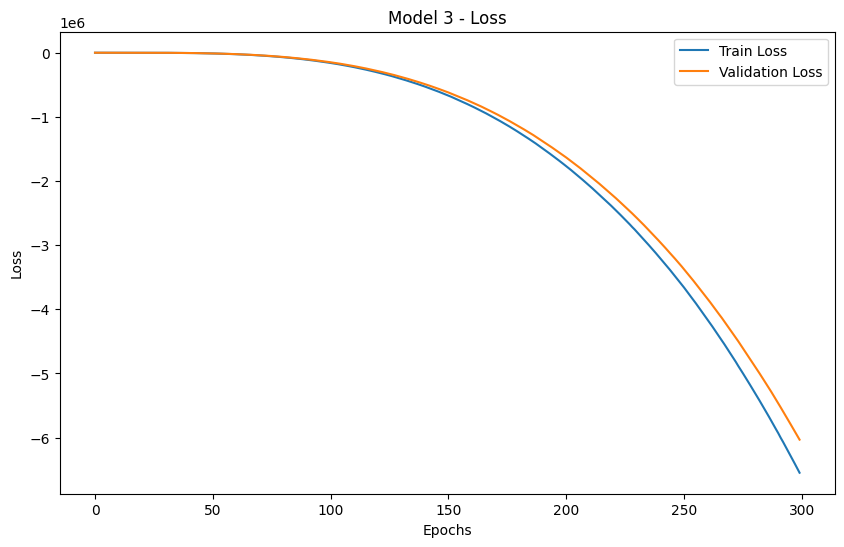

In [59]:
# Model 1
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy', optimizer='adam')

history_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, verbose=0)

plt.figure(figsize=(10, 6))
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 1 - Loss')
plt.legend()
plt.show()

# Model 2
model_2 = Sequential()
model_2.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy', optimizer='adam')

history_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, verbose=0)

plt.figure(figsize=(10, 6))
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 2 - Loss')
plt.legend()
plt.show()

# Model 3
model_3 = Sequential()
model_3.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model_3.add(Dense(16, activation='relu'))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy', optimizer='adam')

history_3 = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, verbose=0)

plt.figure(figsize=(10, 6))
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model 3 - Loss')
plt.legend()
plt.show()


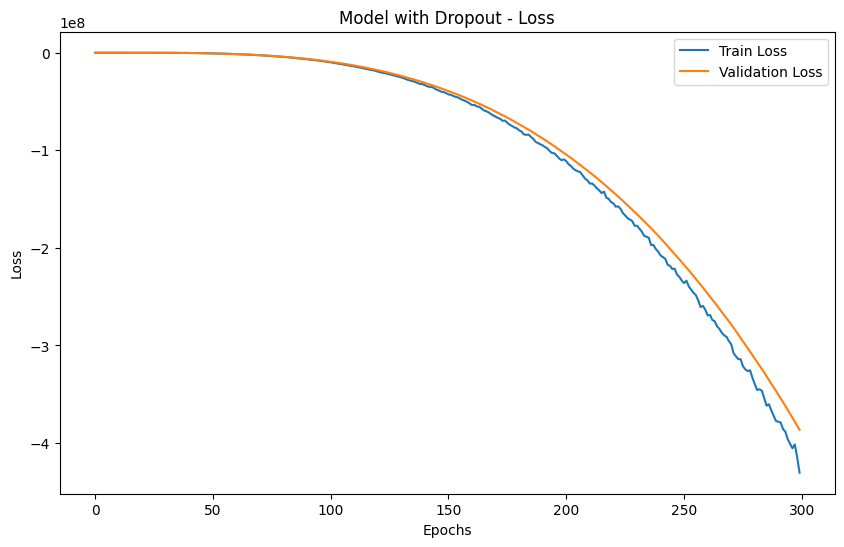

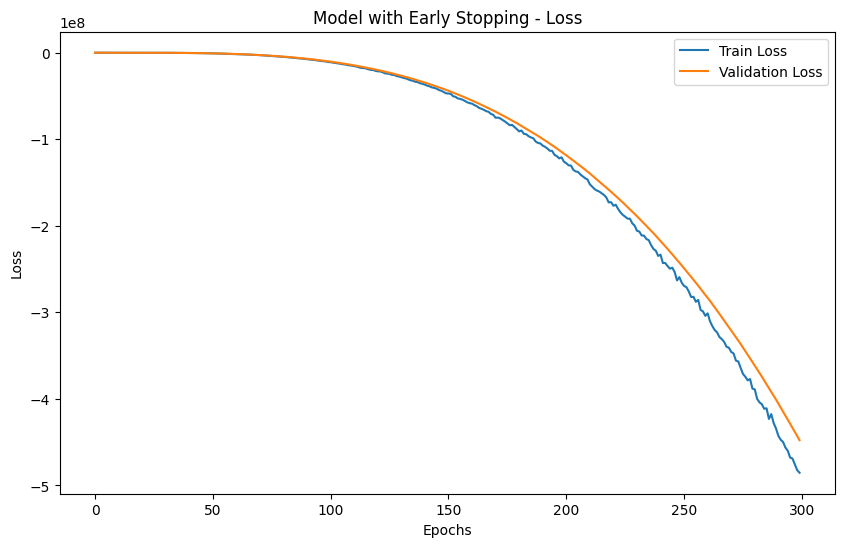

In [60]:
best_model = model_2

# Dropout katmanı eklenmiş model
model_with_dropout = Sequential()
model_with_dropout.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_with_dropout.add(Dropout(0.2))
model_with_dropout.add(Dense(64, activation='relu'))
model_with_dropout.add(Dropout(0.2))
model_with_dropout.add(Dense(32, activation='relu'))
model_with_dropout.add(Dense(1, activation='sigmoid'))

model_with_dropout.compile(loss='binary_crossentropy', optimizer='adam')

history_with_dropout = model_with_dropout.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, verbose=0)

# Dropout katmanı eklenmiş modelin loss grafiği
plt.figure(figsize=(10, 6))
plt.plot(history_with_dropout.history['loss'], label='Train Loss')
plt.plot(history_with_dropout.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model with Dropout - Loss')
plt.legend()
plt.show()


# Early stopping eklenmiş model
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model_with_early_stopping = Sequential()
model_with_early_stopping.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_with_early_stopping.add(Dropout(0.2))
model_with_early_stopping.add(Dense(64, activation='relu'))
model_with_early_stopping.add(Dropout(0.2))
model_with_early_stopping.add(Dense(32, activation='relu'))
model_with_early_stopping.add(Dense(1, activation='sigmoid'))

model_with_early_stopping.compile(loss='binary_crossentropy', optimizer='adam')

history_with_early_stopping = model_with_early_stopping.fit(X_train, y_train, validation_data=(X_test, y_test),
                                                            epochs=300, verbose=0, callbacks=[early_stopping])

# Early stopping eklenmiş modelin loss grafiği
plt.figure(figsize=(10, 6))
plt.plot(history_with_early_stopping.history['loss'], label='Train Loss')
plt.plot(history_with_early_stopping.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model with Early Stopping - Loss')
plt.legend()
plt.show()


1. Veri setinde kaç tane öznitelik ve kaç tane veri sayısı bulunmaktadır?(10 puan)
**İki defa tıklayıp hücreyi çalıştırın ve cevabınızı yazın**
Öznitelik sayısı: 11
Veri sayısı: 583




In [49]:
num_features = len(data.columns)  # Öznitelik sayısı
num_samples = len(data)  # Veri sayısı

print(f"Öznitelik sayısı: {num_features}")
print(f"Veri sayısı: {num_samples}")

Öznitelik sayısı: 11
Veri sayısı: 583


2.Veri setindeki hedef sınıf hangisidir?(10 puan)

**İki defa tıklayıp hücreyi çalıştırın ve cevabınızı yazın**

Target
Hedef sınıf değerleri: [1 2]


In [53]:
# Hedef sınıf değerlerini kontrol edelim
target_classes = data['Target'].unique()

print(f"Hedef sınıf değerleri: {target_classes}")




Hedef sınıf değerleri: [1 2]
